In [75]:
import pandas as pd

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car name"]

cars = pd.read_table('auto-mpg.data.txt', delim_whitespace=True, names=columns)
filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')
filtered_cars.head()

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


# 1. Bias-Variance Tradeoff
Instructions Create a function named train_and_test that:
Takes in a list of column names as the sole parameter (cols),
Trains a linear regression model using:
The columns in cols as the features,
The mpg column as the target variable.
Uses the trained model to make predictions using the same input it was trained on,
Computes the variance of the predicted values and the mean squared error between the predicted values and the actual label (mpg column).
Returns the mean squared error value followed by the variance (e.g. return(mse, variance)).
Use the train_and_test function to train a model using only the cylinders column. Assign the resulting mean squared error value and variance to cyl_mse and cyl_var.
Use the train_and_test function to train a model using only the weight column. Assign the resulting mean squared error value and variance to weight_mse and weight_var.
Hint Use mean_squared_error from scikit-learn to calculate mse.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#def train_and_test(cols):
    #features = filtered_cars[cols]
    #target = filtered_cars["mpg"]
    #lr = LinearRegression()
    #lr.fit(features, target)
    #predictions = lr.predict(features)
    #mse = mean_squared_error(filtered_cars, predictions)
    #variance = np.var(predictions)
    #return(mse, variance)

#cyl_mse, cyl_var = train_and_test(["cylinders"])
#weight_mse, weight_var = train_and_test(["weight"])
#print(cyl_mse)
#print(cyl_var)
#print(weight_mse)
#print(weight_var)

# 2. Multivariate Models
Instructions Use the train_and_test function to train linear regression models using the following columns as the features:
columns: cylinders, displacement.
MSE: two_mse, variance: two_var.
columns: cylinders, displacement, horsepower.
MSE: three_mse, variance: three_var.
columns: cylinders, displacement, horsepower, weight.
MSE: four_mse, variance: four_var.
columns: cylinders, displacement, horsepower, weight, acceleration.
MSE: five_mse, variance: five_var.
columns: cylinders, displacement, horsepower, weight, acceleration, model year
MSE: six_mse, variance: six_var.
columns: cylinders, displacement, horsepower, weight, acceleration, model year, origin
MSE: seven_mse, variance: seven_var.
Use print statements or the variable inspector to display each value.
 Need a hint?

In [72]:
#two_mse, two_var = train_and_test(["cylinders", "displacement"])
#print(two_mse)
#print(two_var)
#three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
#print(three_mse)
#print(three_var)
#four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
#print(four_mse)
#print(four_var)
#five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
#print(five_mse)
#print(five_var)
#six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"])
#print(six_mse)
#print(six_var)
#seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"])
#print(seven_mse)
#print(seven_var)

# 3. Cross Validation
Instructions Create a function named train_and_cross_val that:
takes in a single parameter (list of column names),
trains a linear regression model using the features specified in the parameter,
uses the KFold class to perform 10-fold validation using a random seed of 3 (we use this seed to answer check your code),
calculates the mean squared error across all folds and the mean variance across all folds.
returns the mean squared error value then the variance using a multiple return statement (e.g. return(avg_mse, avg_var)).
Use the train_and_cross_val function to train linear regression models using the following columns as the features:
the cylinders and displacement columns. Assign the resulting mean squared error value to two_mse and the resulting variance value to two_var.
the cylinders, displacement, and horsepower columns. Assign the resulting mean squared error value to three_mse and the resulting variance value to three_var.
the cylinders, displacement, horsepower, and weight columns. Assign the resulting mean squared error value to four_mse and the resulting variance value to four_var.
the cylinders, displacement, horsepower, weight, acceleration columns. Assign the resulting mean squared error value to five_mse and the resulting variance value to five_var.
the cylinders, displacement, horsepower, weight, acceleration, and model year columns. Assign the resulting mean squared error value to six_mse and the resulting variance value to six_var.
the cylinders, displacement, horsepower, weight, acceleration, model year, and origin columns. Assign the resulting mean squared error value to seven_mse and the resulting variance value to seven_var.
Use the variable display to inspect each value.
Hint
Use the random_state parameter when creating the KFold object to set the random seed. Documentation on KFold.

In [73]:
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import numpy as np

def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
        
    kf = KFold (n=len(filtered_cars), n_folds=10, shuffle=True, random_state=3)
    
    for train_index, test_index in kf:
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)
        
        variance_values.append(var)
        mse_values.append(mse)
        
    avg_mse = np.mean(mse_values)
    avg_var = np.var(variance_values)
    return(avg_mse, avg_var)

In [74]:
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"])
print(two_mse)
print(two_var)
print(three_mse)
print(three_var)
print(four_mse)
print(four_var)
print(five_mse)
print(five_var)
print(six_mse)
print(six_var)
print(seven_mse)
print(seven_var)

21.584370275
31.3658612805
20.6556221939
40.0690233132
18.1696832391
40.1271692349
18.2830385172
38.9708619931
12.0996854255
61.9627724678
11.4181319718
80.7309188062


# 4. Plotting Cross-Validation Error Vs. Cross-Validation Variance

Instructions On the same Axes instance:
Generate a scatter plot with the model's number of features on the x-axis and the model's overall, cross-validation mean squared error on the y-axis. Use red for the scatter dot color.
Generate a scatter plot with the model's number of features on the x-axis and the model's overall, cross-validation variance on the y-axis. Use blue for the scatter dot color.
Use plt.show() to display the scatter plot.
Hint
Documentation on scatter. Mission that covers multiple scatter plots on the same Axes instance.

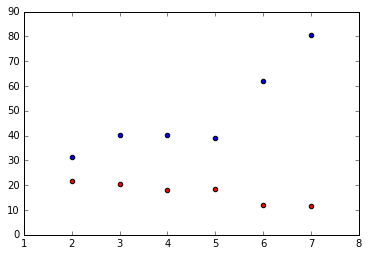

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse,
                             five_mse, six_mse, seven_mse], c="r")
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var,
                             five_var, six_var, seven_var], c="b")